**ACTIVIDAD 2 - DATASET DESAPARECIDOS COLOMBIA 1930 A MARZOZ 2024**

In [3]:
import pandas as pd
ruta='/home/angie/Escritorio/repos/BITrepository/'
tabla=pd.read_csv(ruta+'DATA/Desaparecidos._Colombia__hist_rico__a_os_1930_a_marzo_de_2024_20240729.csv',sep=',',encoding='utf-8')
tabla

,ID,Estado de la desaparición,Clasificación de la desaparición,Fecha de la desaparición,Edad al momento de la desaparición,Sexo del desaparecido,País de nacimiento del desaparecido,Ancestro racial del desaparecido,Estado civil del desaparecido,Escolaridad del desaparecido,Pertenencia grupal del desaparecido,País donde ocurre la desaparición,Municipio donde ocurre la desaparición DANE,Departamento donde ocurre la desaparición DANE,Contexto
0,1,Desaparecido,Sin Información,2006-12-29T00:00:00.000,21,Hombre,Sin información,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Persona adicta a una droga natural o sintética,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
1,2,Desaparecido,Sin Información,2006-12-26T00:00:00.000,24,Hombre,Colombia,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Persona adicta a una droga natural o sintética,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
2,3,Desaparecido,Sin Información,2006-12-29T00:00:00.000,13,Mujer,Colombia,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
3,4,Aparecio Vivo,Sin Información,2006-12-29T00:00:00.000,17,Mujer,Sin información,Mestizo,Soltero (a),Educación técnica profesional y tecnológica,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
4,5,Aparecio Vivo,Sin Información,2006-12-31T00:00:00.000,71,Hombre,Colombia,Mestizo,Unión Libre,Educación básica primaria,Otro,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185736,185996,Desaparecido,Desaparición Presuntamente Forzada,2002-11-10T00:00:00.000,39,Hombre,Colombia,Negro,Soltero (a),Sin escolaridad,Grupos étnicos,Colombia,Condoto,Chocó,Desaparición
185737,185997,Desaparecido,Sin Información,2006-08-20T00:00:00.000,22,Hombre,Colombia,Indigena,Soltero (a),Sin información,Ninguno,Colombia,Ricaurte,Nariño,Desaparición
185738,185998,Desaparecido,Sin Información,1992-04-01T00:00:00.000,18,Hombre,Colombia,Sin Información,Soltero (a),Sin información,Ninguno,Colombia,Matanza,Santander,Desaparición
185739,185999,Desaparecido,Desaparición Presuntamente Forzada,2003-01-01T00:00:00.000,22,Hombre,Colombia,Sin Información,Unión Libre,Educación básica primaria,Ninguno,Colombia,Bucaramanga,Santander,Desaparición


**Grafica 1 - Estadística desaparecidos por departamento**

In [5]:
import matplotlib.pyplot as plt

departamentos_count = tabla["Departamento donde ocurre la desaparición DANE"].value_counts()
departamentos_count

Departamento donde ocurre la desaparición DANE
Bogotá D.C.                                54654
Antioquia                                  24675
Valle Del Cauca                            16575
Meta                                        7943
Cundinamarca                                6976
Norte De Santander                          6453
Risaralda                                   5532
Caldas                                      5331
Nariño                                      4769
Tolima                                      4433
Santander                                   4312
Magdalena                                   4133
Atlántico                                   3323
Cesar                                       3182
Huila                                       3168
Caquetá                                     3000
Putumayo                                    2937
Boyacá                                      2873
Guaviare                                    2580
Bolívar               

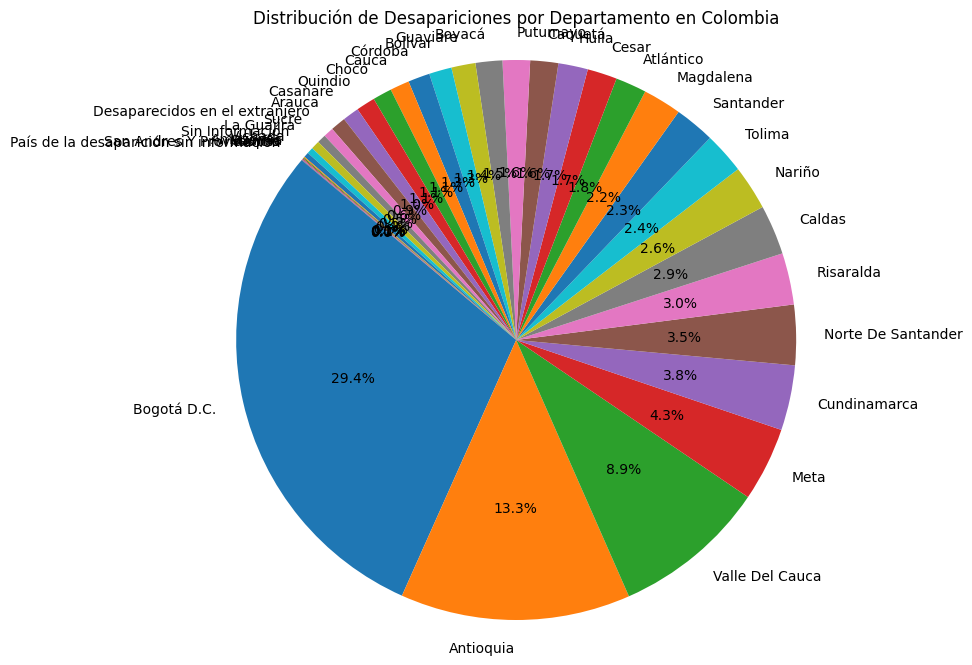

In [6]:
plt.figure(figsize=(10, 8))  
plt.pie(departamentos_count, labels=departamentos_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Desapariciones por Departamento en Colombia')
plt.axis('equal')  # Para que la torta sea un círculo
plt.show()


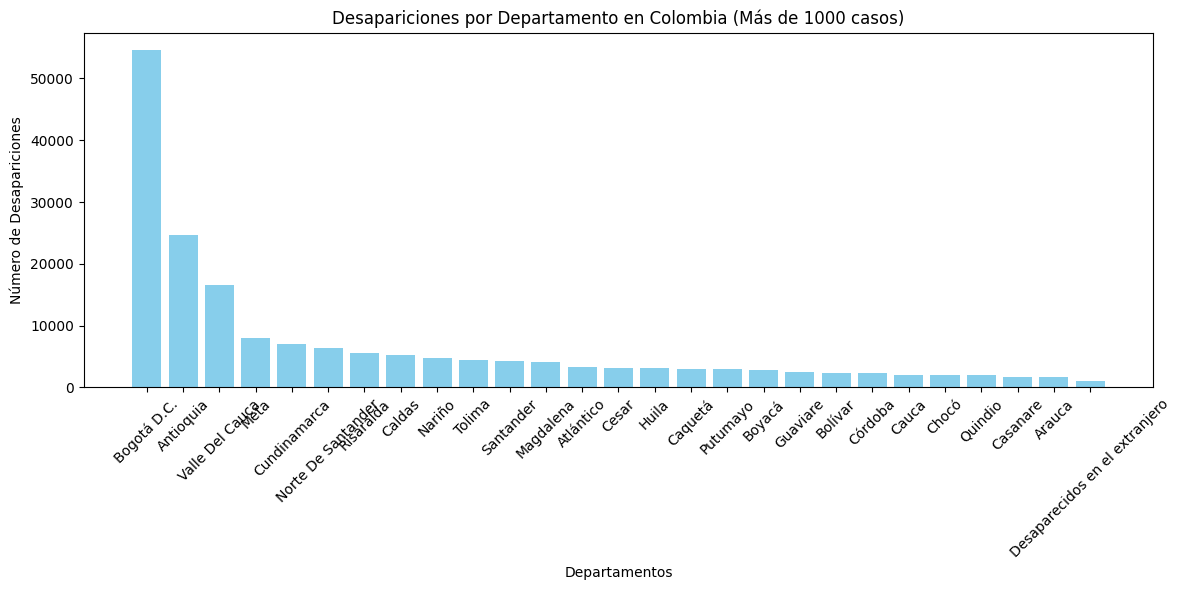

In [16]:
departamentos_filtrado = departamentos_count[departamentos_count>1000]
plt.figure(figsize=(12, 6))  
plt.bar(departamentos_filtrado.index, departamentos_filtrado.values, color='skyblue')
plt.xlabel('Departamentos')
plt.ylabel('Número de Desapariciones')
plt.title('Desapariciones por Departamento en Colombia (Más de 1000 casos)')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


**Análisis**
Se puede observar que los departamentos con mayor nro de desaparecidos son los de Bogotá, Antioquia y Valle del Cauca, casualmente los departamentos mas poblados y con las principales ciudades del País.
Mientras que en los departamentos mas aislados de las ciudades principales como Guainía, Vaupés y San Andrés.


**Grafica 2 - Estadística desaparecidos por los tres departamentos con mayor número por Sexo**

In [20]:

# Agrupar por departamento y sexo
sexo_departamento_counts = tabla.groupby(['Departamento donde ocurre la desaparición DANE','Sexo del desaparecido']).size().reset_index(name='Cantidad')

# Obtener los tres departamentos con más desapariciones
top_departamentos = sexo_departamento_counts.groupby('Departamento donde ocurre la desaparición DANE')['Cantidad'].sum().nlargest(3).index

# Filtrar los datos para incluir solo los tres departamentos principales
datos_filtrados = sexo_departamento_counts[sexo_departamento_counts['Departamento donde ocurre la desaparición DANE'].isin(top_departamentos)]   

datos_filtrados

,Departamento donde ocurre la desaparición DANE,Sexo del desaparecido,Cantidad
2,Antioquia,Hombre,19839
3,Antioquia,Mujer,4836
8,Bogotá D.C.,Hombre,30740
9,Bogotá D.C.,Mujer,23914
66,Valle Del Cauca,Hombre,12154
67,Valle Del Cauca,Mujer,4421


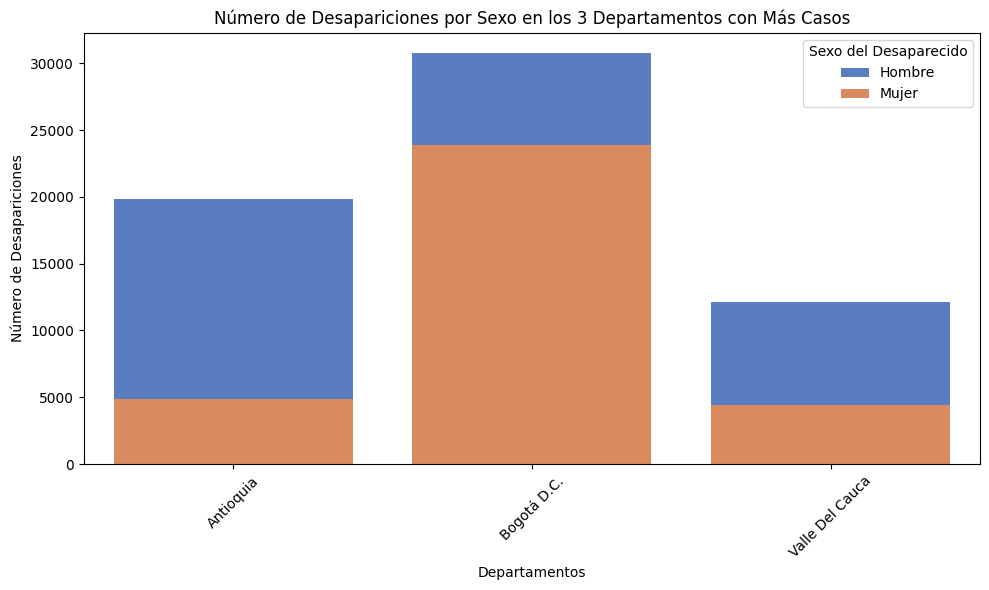

In [22]:
import seaborn as sns

plt.figure(figsize=(10, 6))  
sns.barplot(data=datos_filtrados, x='Departamento donde ocurre la desaparición DANE', y='Cantidad', hue='Sexo del desaparecido', palette='muted', dodge=False)
plt.title('Número de Desapariciones por Sexo en los 3 Departamentos con Más Casos')
plt.xlabel('Departamentos')
plt.ylabel('Número de Desapariciones')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.legend(title='Sexo del Desaparecido')
plt.show()


**Análisis**
Se realiza conteo entre los tres departamentos con mas desaparecidos y se puede observar que en todas tres ciudades en su mayoria son hombres los que mas desaparecen.


**Grafica 3 - Estadística desaparecidos por los tres departamentos con mayor número por Sexo y Estado de la desaparición**

In [5]:

# Agrupar por departamento, sexo y estado de la desaparición, y contar las ocurrencias
estado_sexo_departamento_counts = tabla.groupby(
    ['Departamento donde ocurre la desaparición DANE', 'Sexo del desaparecido', 'Estado de la desaparición']
).size().reset_index(name='Cantidad')

# Obtener los tres departamentos con más desapariciones
top_departamentos = estado_sexo_departamento_counts.groupby('Departamento donde ocurre la desaparición DANE')['Cantidad'].sum().nlargest(3).index

# Filtrar los datos para incluir solo los tres departamentos principales
datos_filtrados = estado_sexo_departamento_counts[estado_sexo_departamento_counts['Departamento donde ocurre la desaparición DANE'].isin(top_departamentos)]
datos_filtrados

,Departamento donde ocurre la desaparición DANE,Sexo del desaparecido,Estado de la desaparición,Cantidad
5,Antioquia,Hombre,Aparecio Muerto,1714
6,Antioquia,Hombre,Aparecio Vivo,4476
7,Antioquia,Hombre,Desaparecido,13649
8,Antioquia,Mujer,Aparecio Muerto,219
9,Antioquia,Mujer,Aparecio Vivo,2595
10,Antioquia,Mujer,Desaparecido,2022
23,Bogotá D.C.,Hombre,Aparecio Muerto,1591
24,Bogotá D.C.,Hombre,Aparecio Vivo,10542
25,Bogotá D.C.,Hombre,Desaparecido,18607
26,Bogotá D.C.,Mujer,Aparecio Muerto,351


In [14]:
import plotly.express as px

fig = px.bar(
    datos_filtrados,
    x='Departamento donde ocurre la desaparición DANE',
    y='Cantidad',
    color='Estado de la desaparición',
    text='Cantidad',
    title='Número de Desapariciones por Sexo y Estado en los 3 Departamentos con Más Casos',
    labels={'Cantidad': 'Número de Desapariciones', 'Departamento donde ocurre la desaparición DANE': 'Departamentos'}
)

fig.show()



**Análisis**

Con la grafica se puede determinar que mas del 50% de las personas permanecen desparecidas en todas los tres departamentos y solo un mínimo de persona aparecen vivas o muertas
